In [4]:
import sys
sys.path.insert(0,'/home/richard.brito/pSEOBNRv4HM/opt/lib64/python2.7/site-packages/')

In [5]:
%matplotlib inline
import lalsimulation,lal
#help(lal)
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import h5py

## Notes

i) Below I plot some waveforms for which we get wrap-around warnings. 

ii) The waveforms are aligned such that the last index of the waveform is the same one as the one used by lalinference. 

iii)The red line marks the "unsafelength"as defined in lalinference corresponding to the tapering region  

## Examples that give seglen warnings

values taken from https://hypatia.aei.mpg.de/~abhirup.ghosh/LVC/spinqnm/runs/review/21g_prod/wraparound/log/lalinference-1181693-0-.err and https://hypatia.aei.mpg.de/~abhirup.ghosh/LVC/spinqnm/runs/review/21g_prod/wraparound/log/lalinference-1181634-0-.err

In [6]:
mchirp_array=[77.36591,137.72510,143.17203,77.36591,137.72510,82.69567,145.97442,
             114.16498,106.09066,129.66840]
q_array=[0.26531,0.85198,0.78392,0.26531,0.85198,0.24787,0.89817,
        0.45166,0.40853,0.59406]
a1_array=[0.98591,0.79086,0.85905,0.98591,0.79086,0.98679,0.36509,
         0.87301,0.91884,0.98619]
a2_array=[0.74794,0.89010,0.61860,0.74794,0.89010,0.71553,0.75877,
         0.88337,0.56552,0.98677]

domega_array=[1.29030,1.26094,-0.08265,1.29030,1.26094,0.05108,-0.19455,
             0.79390,-0.18846,-0.23571]
dtau_array=[1.87026,1.94792,1.95835,1.87026,1.94792,1.47346,1.99555,
           1.82541,1.94059,1.64500]

buffend_array=[7788,7802,7838,7788,7802,7752,7741,7740,7755,7943]

delta_tau=1.87026, post-merger length=1.594665535 seconds
(7788, 7788.0)


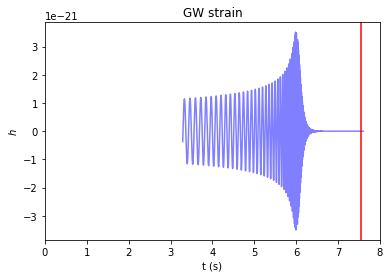

delta_tau=1.94792, post-merger length=1.5193462525 seconds
(7802, 7802.0)


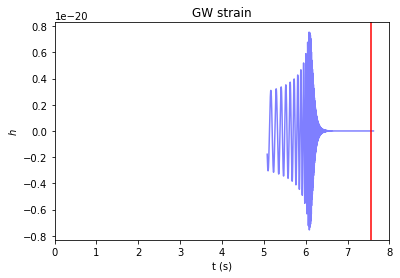

delta_tau=1.95835, post-merger length=1.658981696 seconds
(7838, 7838.0)


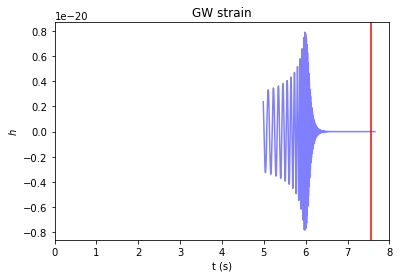

delta_tau=1.87026, post-merger length=1.594665535 seconds
(7788, 7788.0)


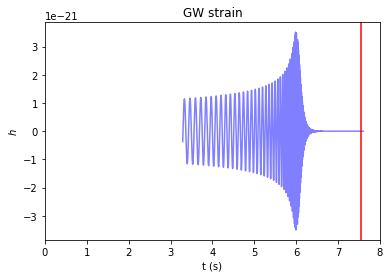

delta_tau=1.94792, post-merger length=1.5193462525 seconds
(7802, 7802.0)


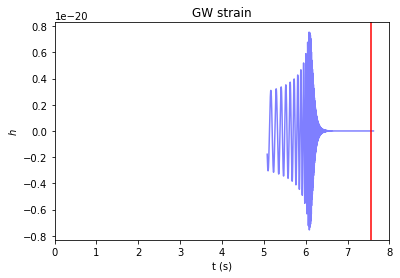

delta_tau=1.47346, post-merger length=1.5560435285 seconds
(7752, 7752.0)


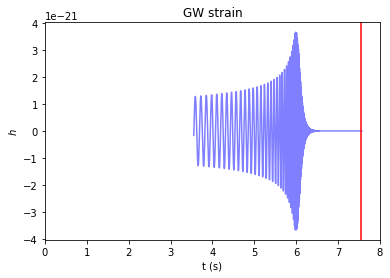

delta_tau=1.99555, post-merger length=1.4229626515 seconds
(7741, 7741.0)


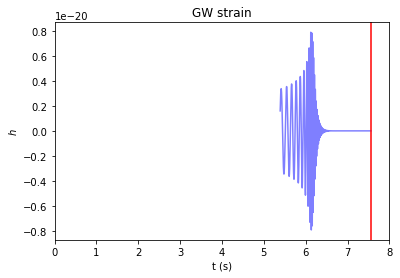

delta_tau=1.82541, post-merger length=1.431728118 seconds
(7740, 7740.0)


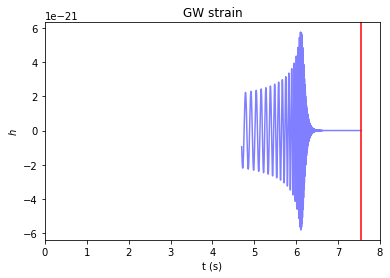

delta_tau=1.94059, post-merger length=1.5098203345 seconds
(7755, 7755.0)


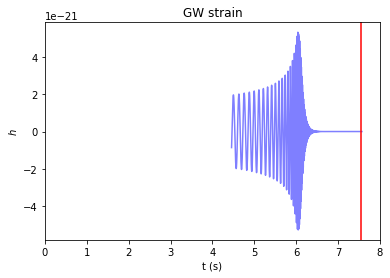

delta_tau=1.645, post-merger length=1.6372847405 seconds
(7943, 7943.0)


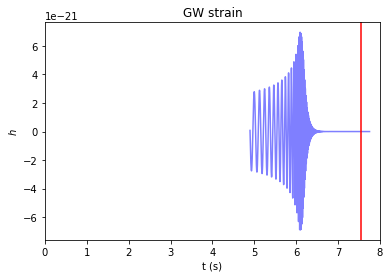

In [14]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

distance    = 500*(10**6)*lal.PC_SI

maxShift = round(4.255e-2/deltaT)
taperLength = round(0.4/deltaT)

unsafeLength = taperLength + maxShift

for i in range(0,10):
    
    # Define binary parameters
    mchirp     = mchirp_array[i]*lal.MSUN_SI
    q          = q_array[i]

    m1          = mchirp*pow(1. + q,1.0/5.0)*pow(q,-3./5.)
    m2          = m1*q
    
    spin1_z     = a1_array[i]
    spin2_z     = a1_array[i]

    TGRparams_dict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, domega_array[i])
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict, dtau_array[i])


    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    h = hp.data.data - 1j*hc.data.data
    time_array0 = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)
    
    time_array= time_array0+deltaT*round(buffend_array[i]-time_array0[-1]/deltaT)

    plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=.5)
    print "delta_tau={}, post-merger length={} seconds".format(dtau_array[i],time_array0[-1])
    print(buffend_array[i],round(time_array[-1]/deltaT))
    
    plt.axvline(x=8.-unsafeLength*deltaT,color='red')
    
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')
    plt.xlim([0,8])
    plt.show()

## Conclusion

i) To avoid that the post-merger overlap with the tapering regions should be enough to avoid priors such that the post-merger length  >~ 1.4 seconds 

ii) The region that overlaps with the tapering region corresponds to zeroes in the waveform, so should not affect the results 